In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df1=pd.read_csv(r'indiadata.csv')
df1.head()

,Unnamed: 0,iyear,city,country_txt,latitude,longitude,attacktype1_txt,targtype1_txt,targsubtype1_txt,target1,...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,2689,1975,Samastipur,India,25.863042,85.781004,Bombing/Explosion,Government (General),"Government Personnel (excluding police, military)",Lalit Narayan Mishra and a legislator,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,64983,1997,Unknown,India,33.778175,76.576171,Bombing/Explosion,Transportation,Bus Station/Stop,A bus station in Kashmir,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,66994,1997,Dhalai district,India,23.846698,91.909924,Bombing/Explosion,Military,Military Unit/Patrol/Convoy,Border Patrol Guards,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,67087,1997,Hyderabad,India,17.376812,78.487812,Bombing/Explosion,Private Citizens & Property,"Procession/Gathering (funeral, wedding, birthd...",People leaving a party. Wounded included Moha...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,67454,1998,New Delhi,India,28.632381,77.220004,Bombing/Explosion,Private Citizens & Property,Unnamed Civilian/Unspecified,Civilians in New Delhi,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df1.columns.get_loc('summary')

14

In [10]:
df1=df1.drop(df1.iloc[:,15:],axis=1)
df1.head()

,Unnamed: 0,iyear,city,country_txt,latitude,longitude,attacktype1_txt,targtype1_txt,targsubtype1_txt,target1,weaptype1_txt,weapsubtype1_txt,gname,motive,summary
0,2689,1975,Samastipur,India,25.863042,85.781004,Bombing/Explosion,Government (General),"Government Personnel (excluding police, military)",Lalit Narayan Mishra and a legislator,Explosives/Bombs/Dynamite,Unknown Explosive Type,Ananda Marga,Unknown,"1/2/1975: The Indian Railway Minister, Lalit N..."
1,64983,1997,Unknown,India,33.778175,76.576171,Bombing/Explosion,Transportation,Bus Station/Stop,A bus station in Kashmir,Explosives/Bombs/Dynamite,Vehicle,Muslim Rebels,"Specific motive is unknown; however, the blast...",3/29/1997: Two explosions occurred at a bus st...
2,66994,1997,Dhalai district,India,23.846698,91.909924,Bombing/Explosion,Military,Military Unit/Patrol/Convoy,Border Patrol Guards,Explosives/Bombs/Dynamite,Land Mine,National Liberation Front of Tripura (NLFT),"While the motive for this attack is unknown, t...",11/7/1997: A suspected anti-tank land mine exp...
3,67087,1997,Hyderabad,India,17.376812,78.487812,Bombing/Explosion,Private Citizens & Property,"Procession/Gathering (funeral, wedding, birthd...",People leaving a party. Wounded included Moha...,Explosives/Bombs/Dynamite,Vehicle,Unknown,"While the motive for this attack is unknown, i...",11/19/1997: A car bomb exploded in Hyderabad i...
4,67454,1998,New Delhi,India,28.632381,77.220004,Bombing/Explosion,Private Citizens & Property,Unnamed Civilian/Unspecified,Civilians in New Delhi,Explosives/Bombs/Dynamite,Time Fuse,Unknown,Unknown,"01/09/1998: At least 44 people were injured, t..."


In [11]:
df1=df1.drop('motive',axis=1)

In [12]:
### Fetching dates from summary column
df1['Date']=df1['summary'].str.split(':').str[0]
df1['Date']

0         1/2/1975
1        3/29/1997
2        11/7/1997
3       11/19/1997
4       01/09/1998
           ...    
4963    12/24/2015
4964    12/25/2015
4965    12/25/2015
4966    12/26/2015
4967    12/30/2015
Name: Date, Length: 4968, dtype: object

In [ ]:
### Splitting dates into day,month,year
df1['Month']=df1['Date'].str.split('/').str[0]
df1['Day']=df1['Date'].str.split('/').str[1]
df1['Year']=df1['Date'].str.split('/').str[2]

In [14]:
len(df1['city'].unique())

2228

In [33]:
cat=[x for x in df1.columns if df1[x].dtypes=='object']
for x in cat:
    print(x,':',len(df1[x].unique()))

city : 2226
attacktype : 9
targtype : 21
targsubtype : 87
target : 3988
weaptype : 8
weapsubtype : 29
gname : 158


In [16]:
### Dropping year, index column and country name
df1=df1.drop(['Unnamed: 0','iyear','country_txt'],axis=1)

In [17]:
df1=df1.drop(['summary','Date'],axis=1)

In [18]:
### Rows with null missing values
df1.loc[df1['Year'].isnull()].index

Int64Index([1890, 1974, 2620, 4373, 4715, 4716, 4923], dtype='int64')

In [19]:
df1=df1.drop((df1.loc[df1['Year'].isnull()].index),axis=0)

In [20]:
### Numerical values
num=[x for x in df1.columns if df1[x].dtypes!='object']
df1[num]

,latitude,longitude
0,25.863042,85.781004
1,33.778175,76.576171
2,23.846698,91.909924
3,17.376812,78.487812
4,28.632381,77.220004
...,...,...
4963,23.633224,85.514874
4964,20.225002,85.418406
4965,18.343586,81.882528
4966,18.325329,81.429048


In [26]:
df1['Year']=df1['Year'].str.split(' ').str[0]

In [27]:
df1['Year']=df1['Year'].str.split('.').str[0]

In [28]:
### Number of attacks per year
df1['Year'].value_counts()

2009    670
2010    655
2011    642
2008    506
2013    263
2015    242
2014    232
2001    231
2012    224
2003    196
2002    181
2000    179
2006    164
2007    149
2005    143
1999    111
2004    108
1998     61
1997      3
1975      1
Name: Year, dtype: int64

In [23]:
df1['Day']=df1['Day'].astype(int)

In [24]:
df1['Month']=df1['Month'].astype(int)

In [29]:
df1['Year']=df1['Year'].astype(int)

In [30]:
df1=df1.rename(columns={'attacktype1_txt':'attacktype'})
df1=df1.rename(columns={'targtype1_txt':'targtype'})
df1=df1.rename(columns={'targsubtype1_txt':'targsubtype'})
df1=df1.rename(columns={'target1':'target'})
df1=df1.rename(columns={'weaptype1_txt':'weaptype'})
df1=df1.rename(columns={'weapsubtype1_txt':'weapsubtype'})

In [ ]:
df1['city'].value_counts()

Imphal      228
Srinagar    220
Unknown     136
Guwahati     61
Sopore       40
           ... 
Rahe          1
Awoora        1
Sonbarsa      1
Meduru        1
Zhutovi       1
Name: city, Length: 2226, dtype: int64

In [ ]:
df1['weapsubtype'].value_counts()

Unknown Gun Type                             1564
Unknown Explosive Type                        674
Grenade                                       533
.                                             403
Arson/Fire                                    329
Other Explosive Type                          315
Land Mine                                     265
Knife or Other Sharp Object                   181
Automatic Weapon                              180
Remote Trigger                                 80
Vehicle                                        75
Time Fuse                                      61
Dynamite/TNT                                   53
Gasoline or Alcohol                            46
Handgun                                        44
Projectile (rockets, mortars, RPGs, etc.)      43
Hands, Feet, Fists                             30
Blunt Object                                   25
Other Gun Type                                 12
Rifle/Shotgun (non-automatic)                  11


In [ ]:
df1[cat]

,city,attacktype,targtype,targsubtype,target,weaptype,weapsubtype,gname
0,Samastipur,Bombing/Explosion,Government (General),"Government Personnel (excluding police, military)",Lalit Narayan Mishra and a legislator,Explosives/Bombs/Dynamite,Unknown Explosive Type,Ananda Marga
1,Unknown,Bombing/Explosion,Transportation,Bus Station/Stop,A bus station in Kashmir,Explosives/Bombs/Dynamite,Vehicle,Muslim Rebels
2,Dhalai district,Bombing/Explosion,Military,Military Unit/Patrol/Convoy,Border Patrol Guards,Explosives/Bombs/Dynamite,Land Mine,National Liberation Front of Tripura (NLFT)
3,Hyderabad,Bombing/Explosion,Private Citizens & Property,"Procession/Gathering (funeral, wedding, birthd...",People leaving a party. Wounded included Moha...,Explosives/Bombs/Dynamite,Vehicle,Unknown
4,New Delhi,Bombing/Explosion,Private Citizens & Property,Unnamed Civilian/Unspecified,Civilians in New Delhi,Explosives/Bombs/Dynamite,Time Fuse,Unknown
...,...,...,...,...,...,...,...,...
4963,Ramgarh,Bombing/Explosion,Business,Industrial/Textiles/Factory,Electricity Transformer,Explosives/Bombs/Dynamite,Dynamite/TNT,Communist Party of India - Maoist (CPI-Maoist)
4964,Badapadar,Assassination,Government (General),Politician or Political Party Movement/Meeting...,Village Head: Jayaram Khara,Firearms,Automatic Weapon,Communist Party of India - Maoist (CPI-Maoist)
4965,Kudumulgumma Raba,Hostage Taking (Kidnapping),Government (General),Politician or Political Party Movement/Meeting...,Brother of Former Village Head: Sahdev Badanayak,Firearms,Automatic Weapon,Communist Party of India - Maoist (CPI-Maoist)
4966,Pariya,Hostage Taking (Kidnapping),Government (General),"Government Personnel (excluding police, military)",Postmaster: Sujit Modiyami,Firearms,Unknown Gun Type,Maoists


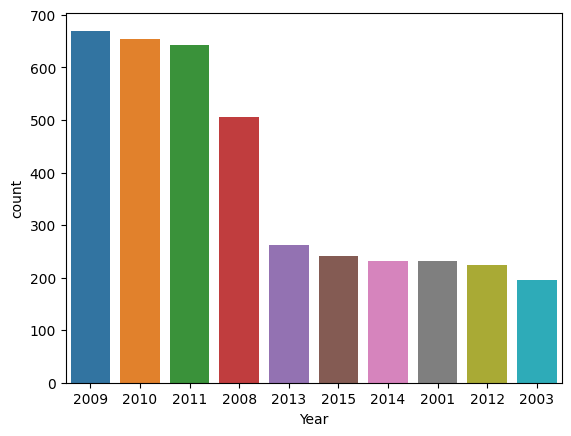

In [ ]:
sns.countplot(x=df1['Year'],order=df1['Year'].value_counts().iloc[:10].index)
plt.rcParams['figure.figsize']=(16,16)
plt.show()

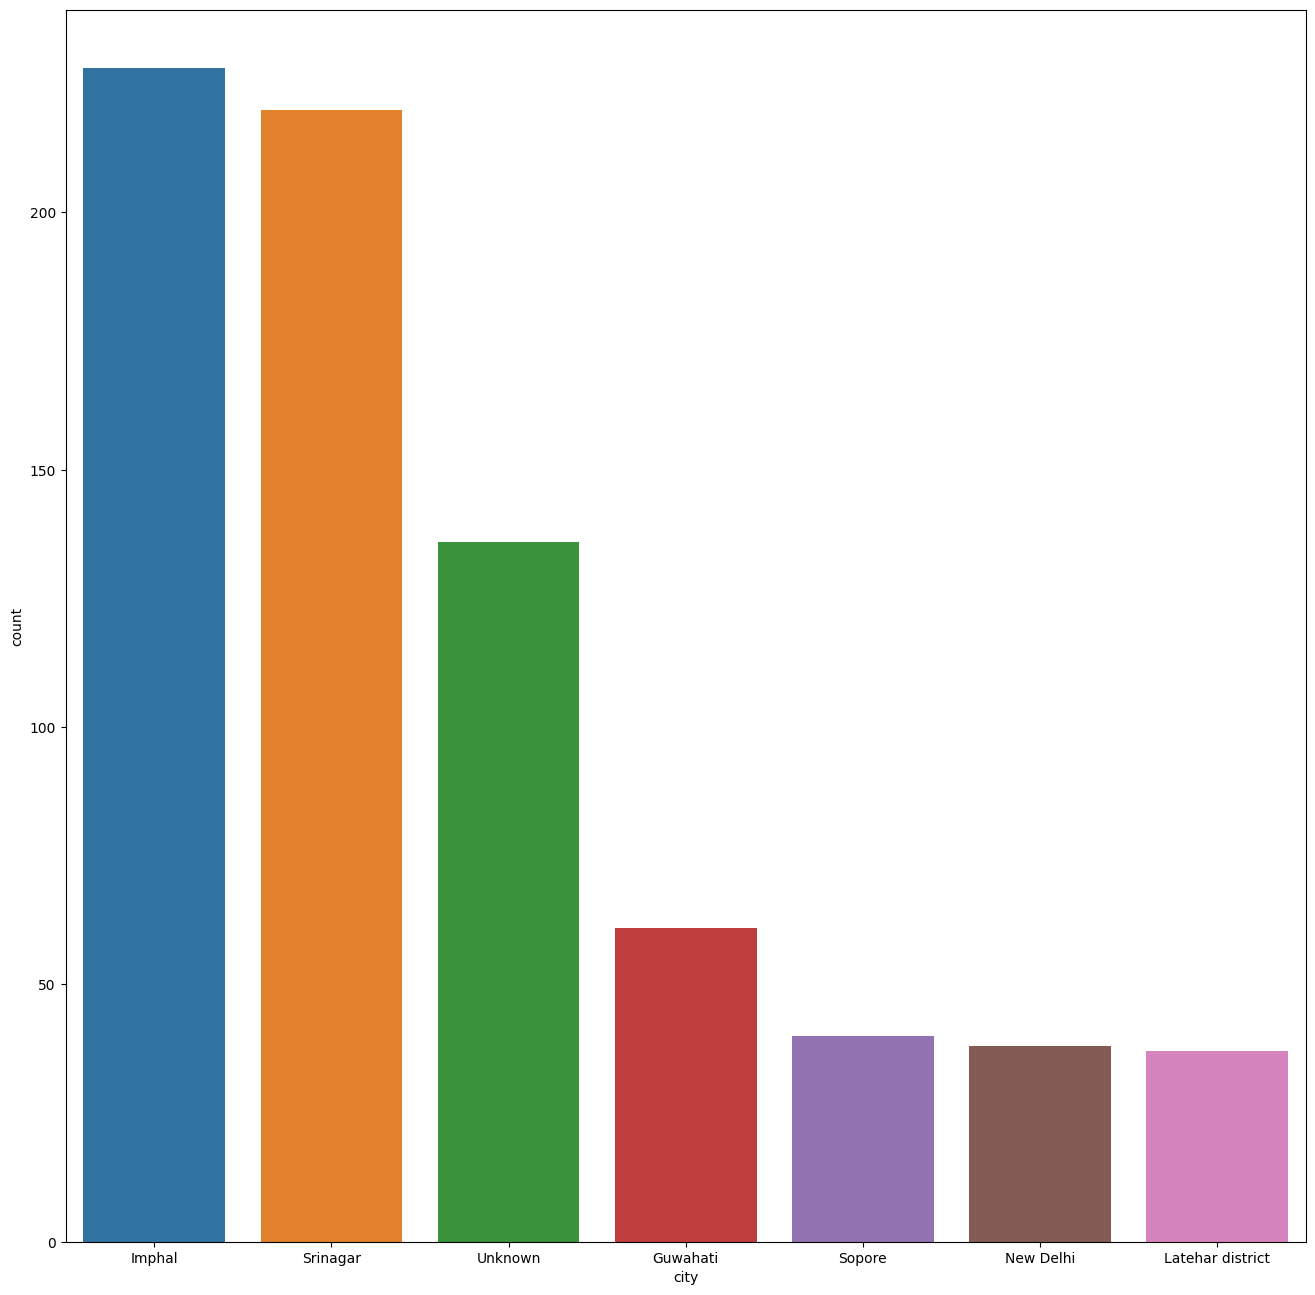

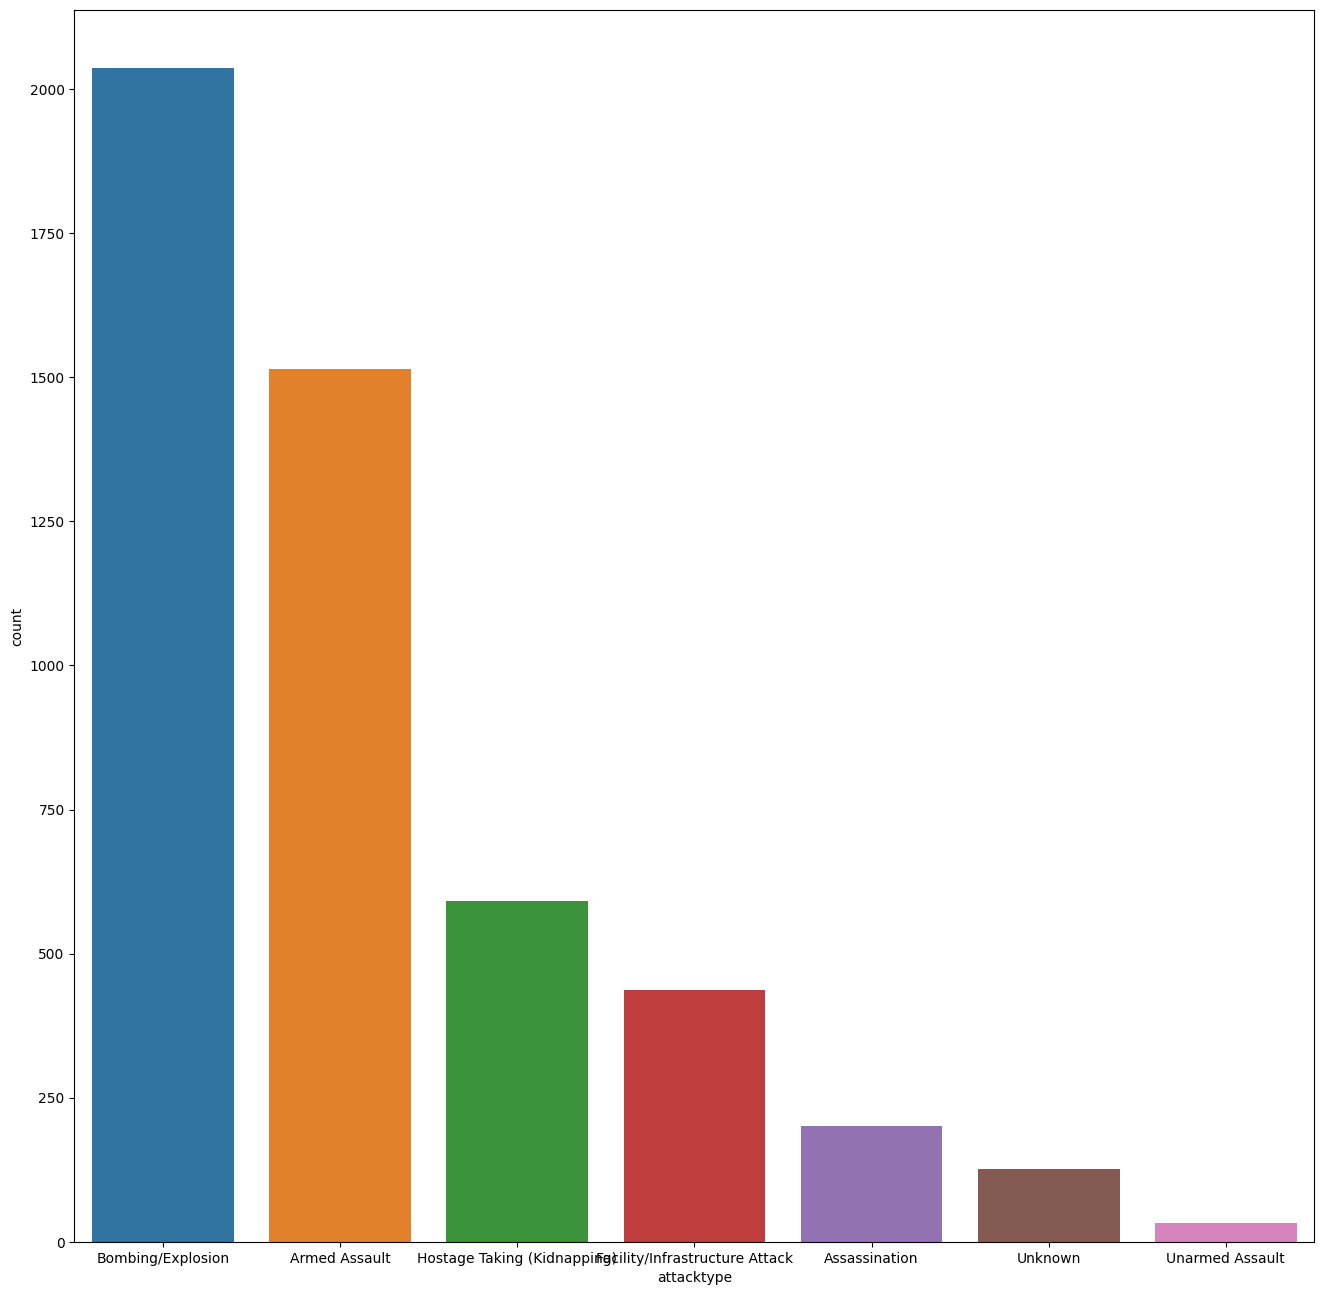

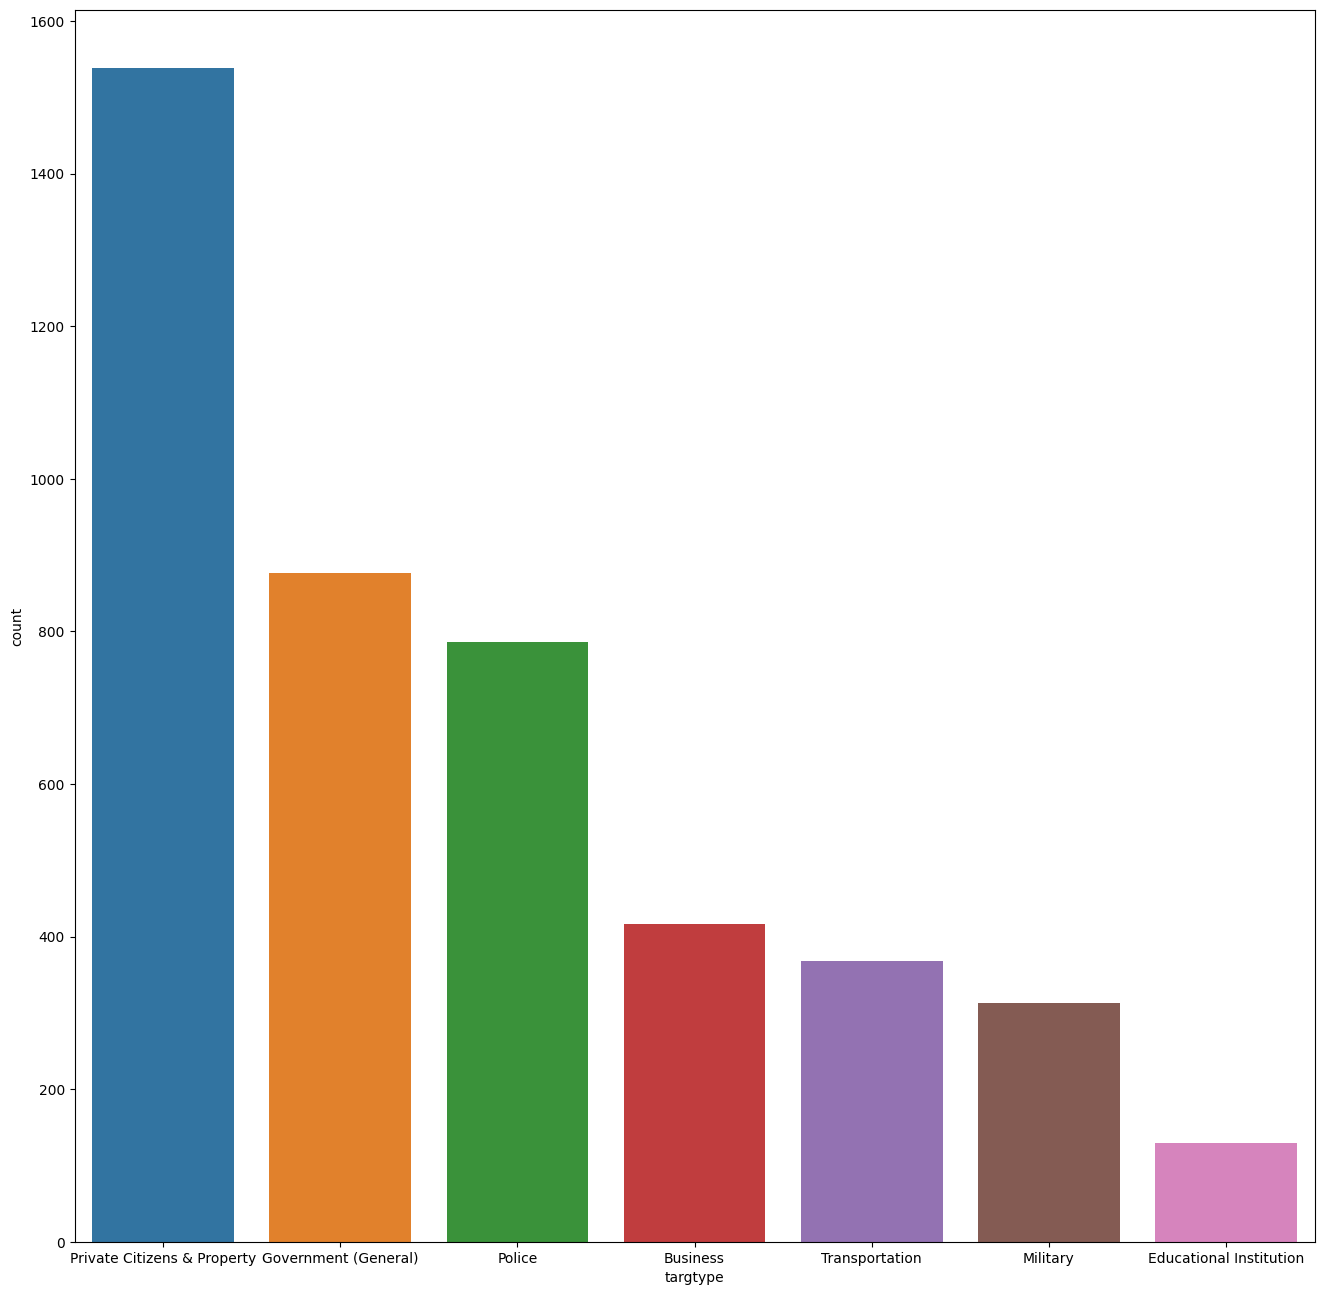

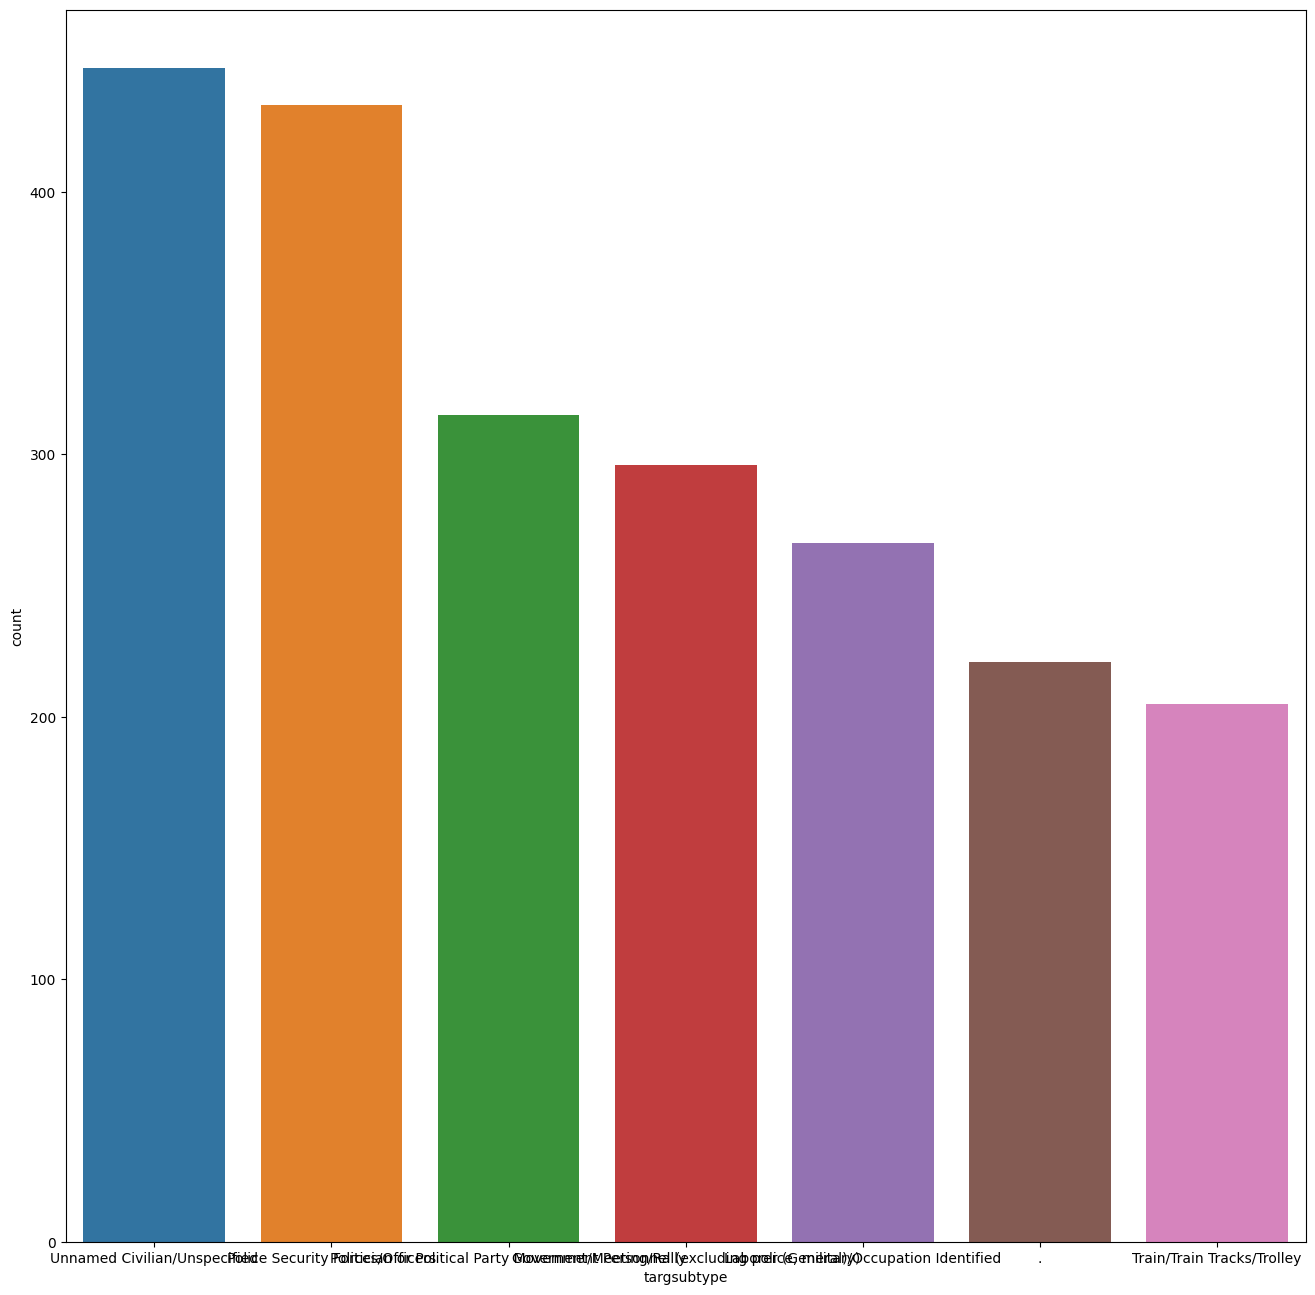

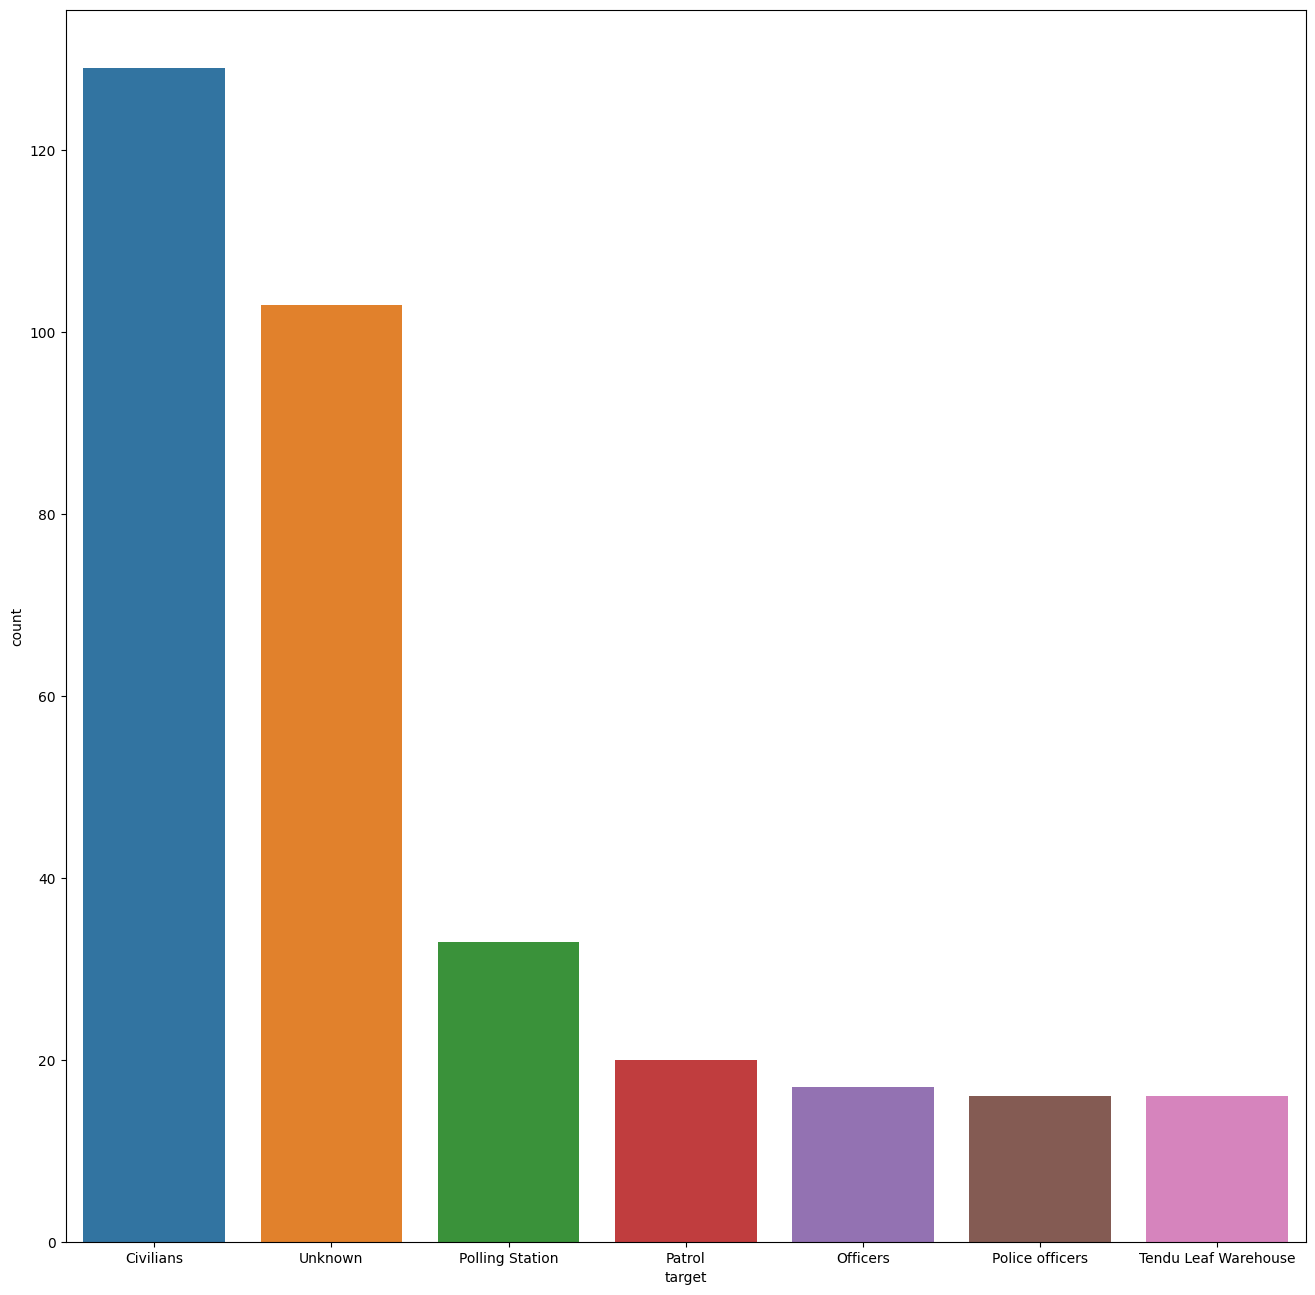

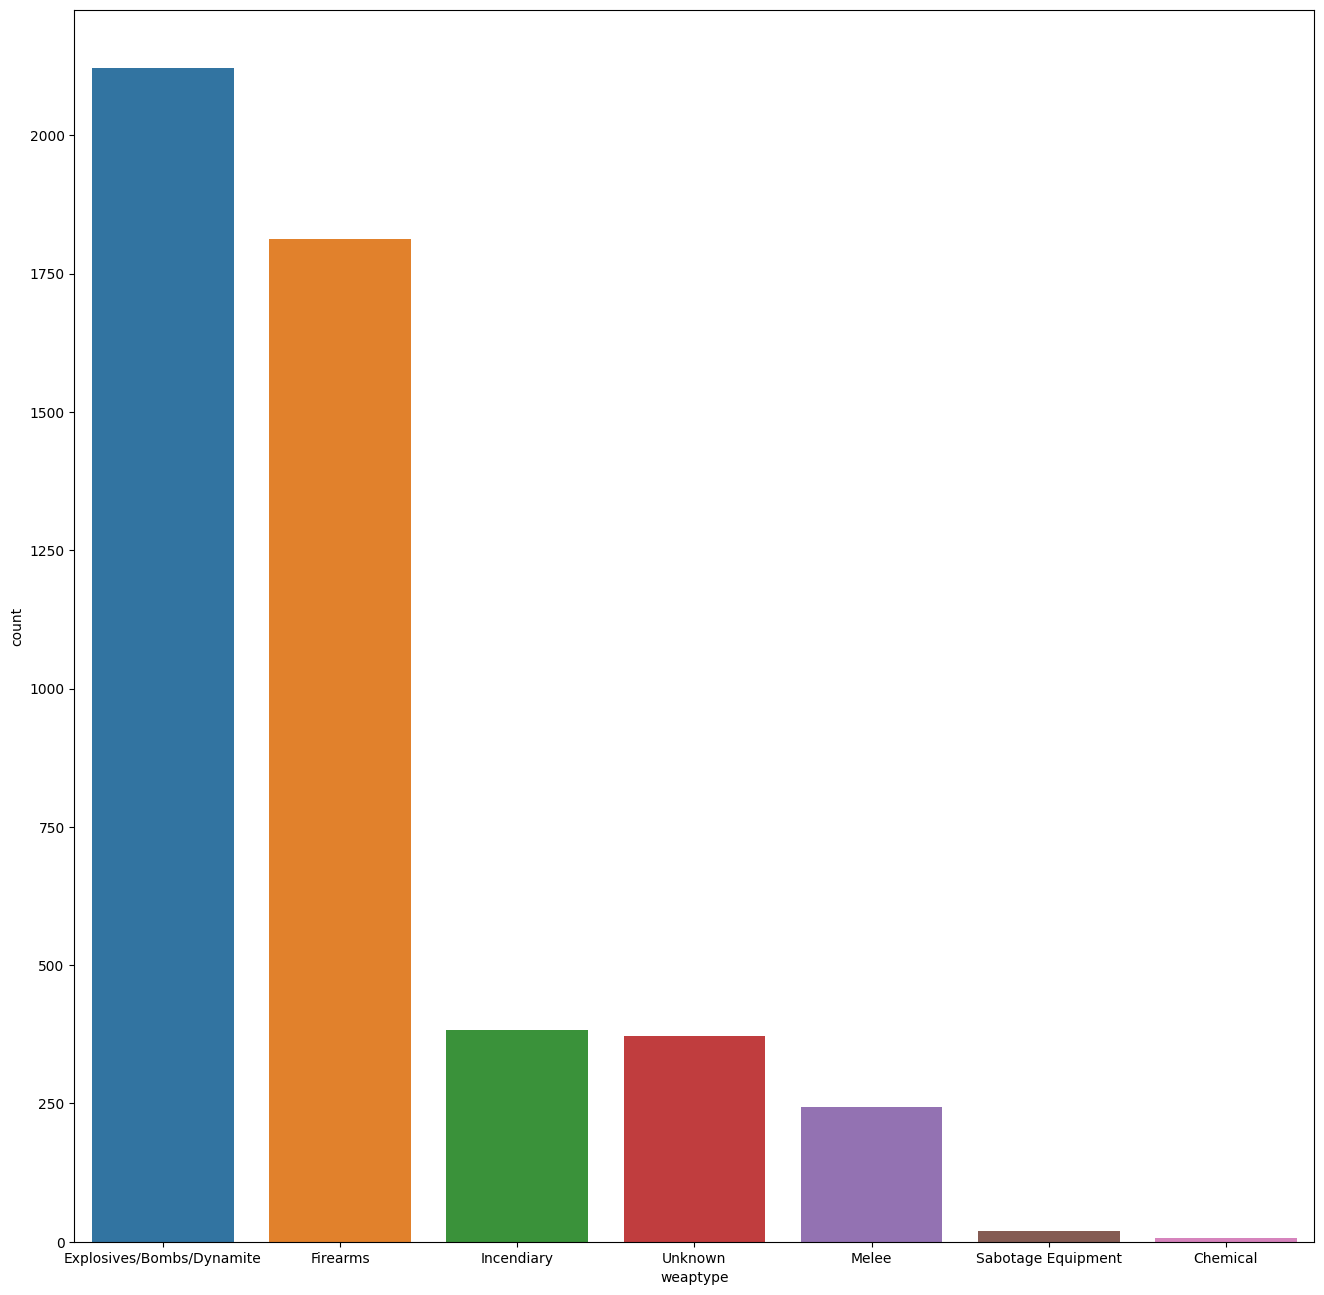

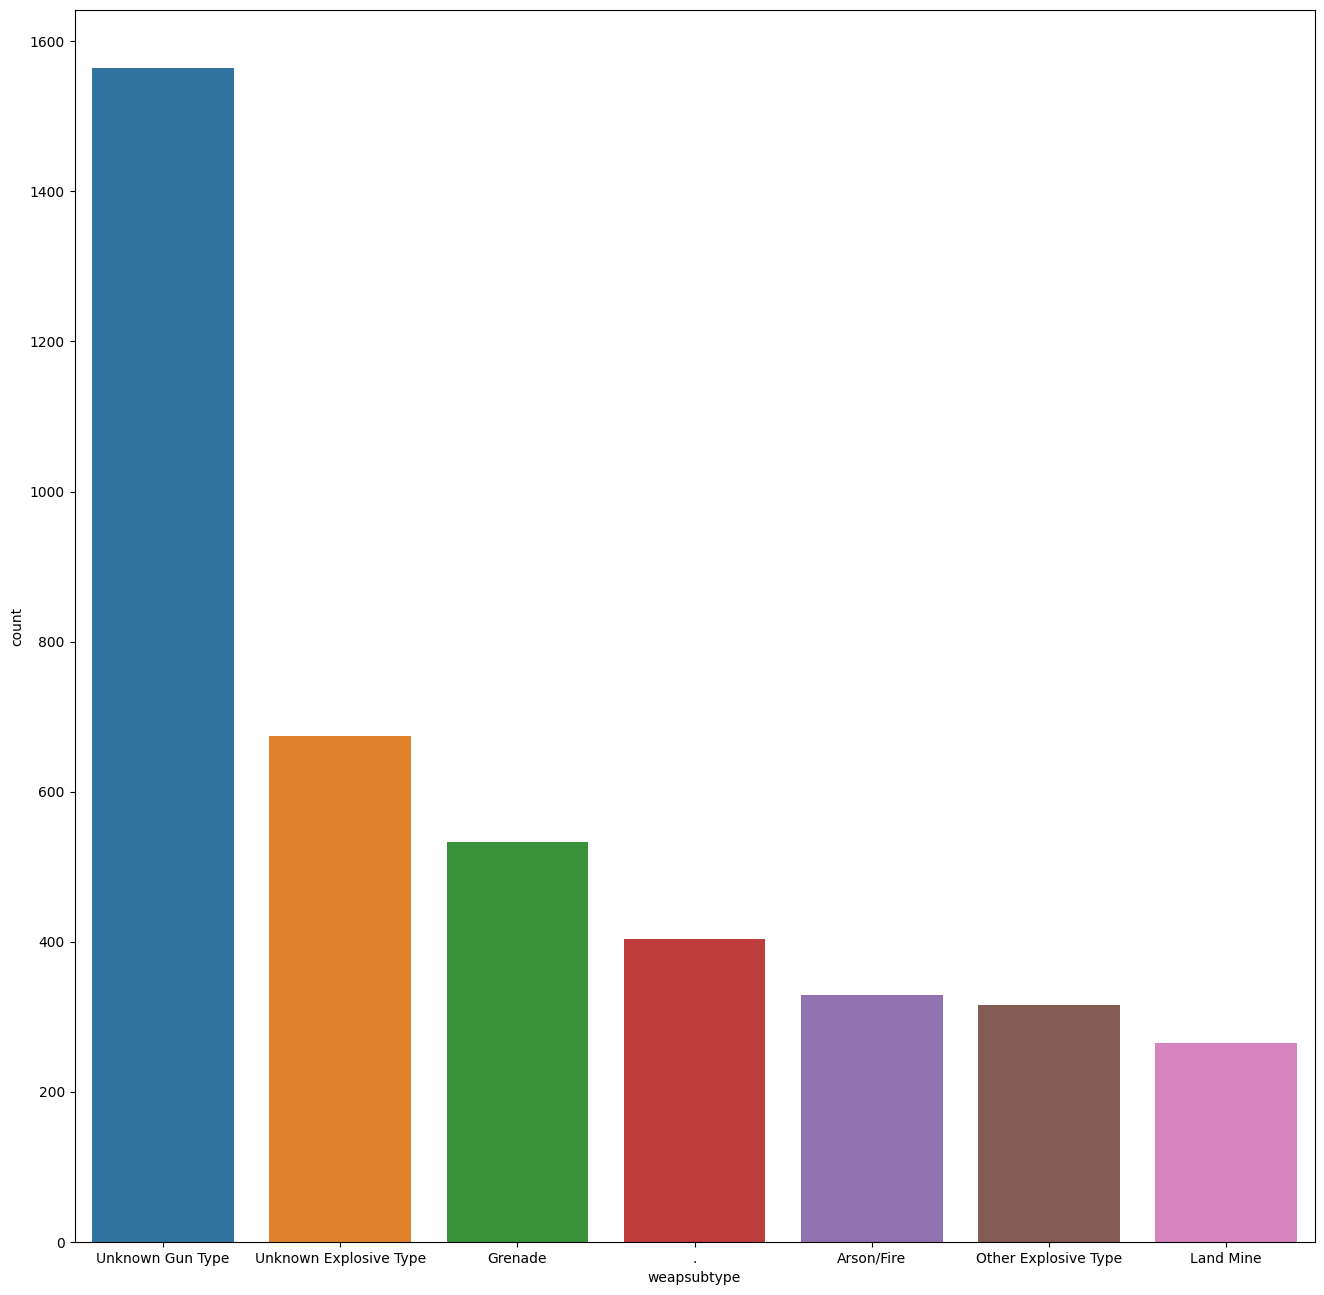

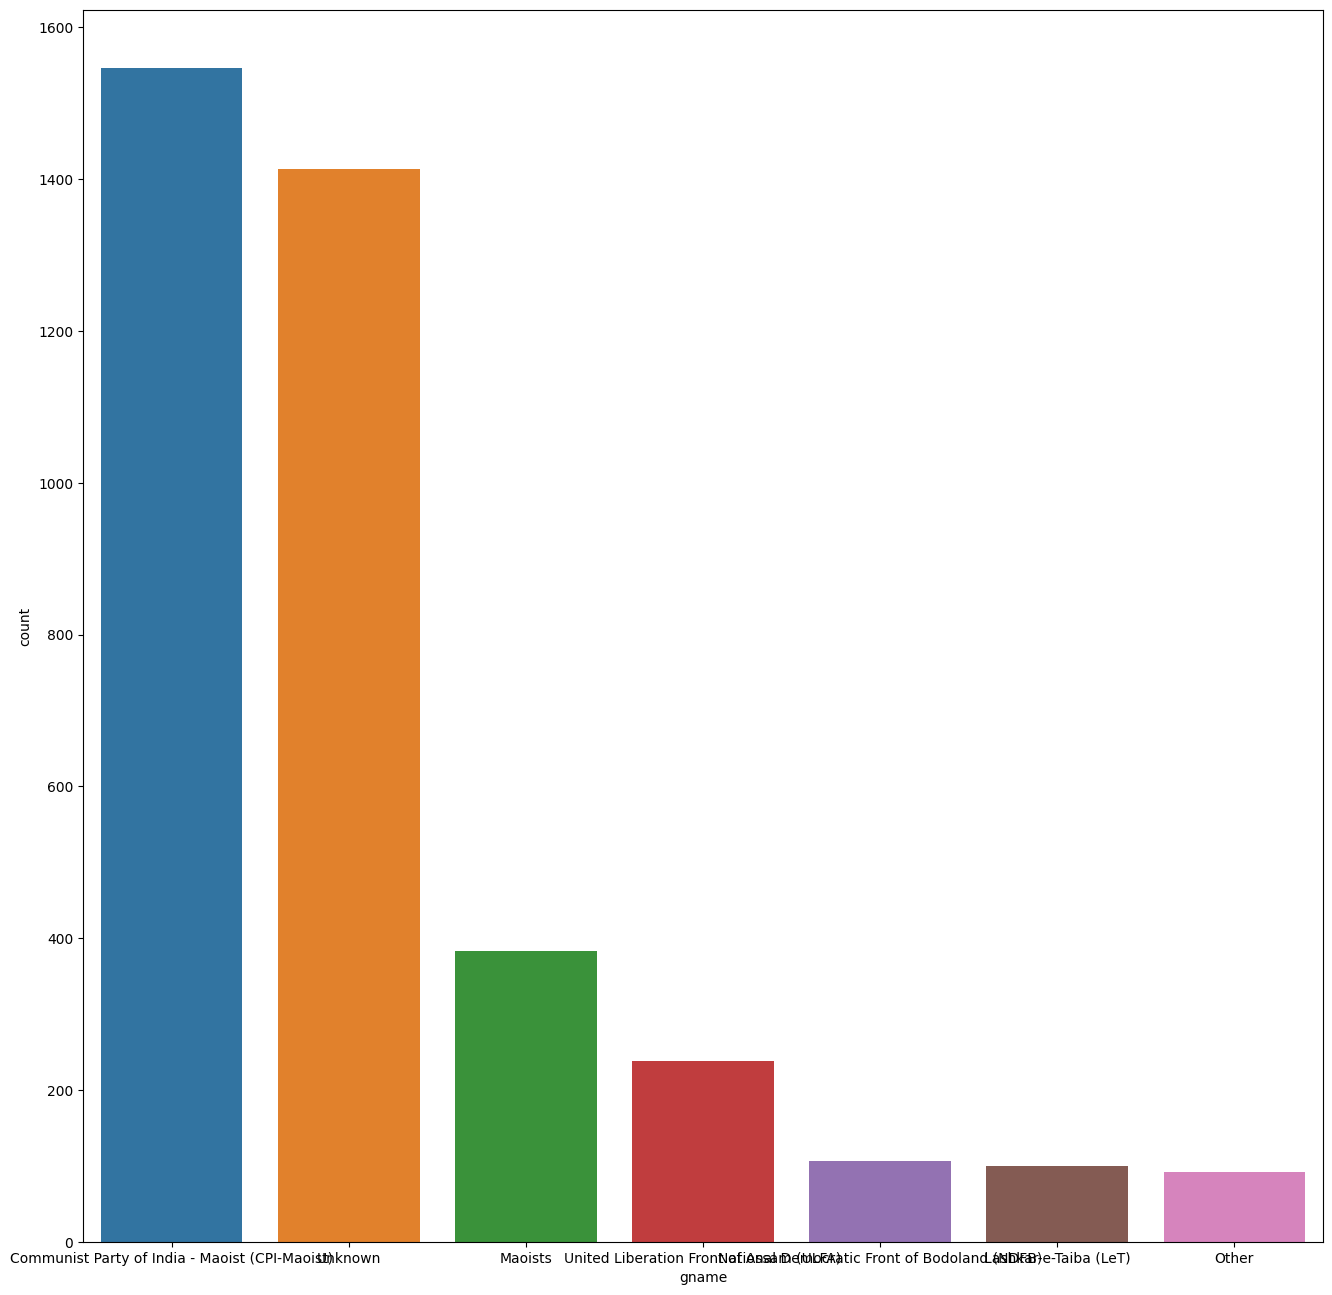

In [ ]:
for x in cat:
    sns.countplot(x=df1[x],order=df1[x].value_counts().iloc[:7].index)
    plt.rcParams['figure.figsize']=(16,16)
    plt.show()

In [34]:
for x in cat:
    if len(df1[x].unique())<2000:
        print(x,len(df1[x].unique()))

attacktype 9
targtype 21
targsubtype 87
weaptype 8
weapsubtype 29
gname 158


In [35]:
df2=df1.copy()

In [36]:
df2.head()

,city,latitude,longitude,attacktype,targtype,targsubtype,target,weaptype,weapsubtype,gname,Month,Day,Year
0,Samastipur,25.863042,85.781004,Bombing/Explosion,Government (General),"Government Personnel (excluding police, military)",Lalit Narayan Mishra and a legislator,Explosives/Bombs/Dynamite,Unknown Explosive Type,Ananda Marga,1,2,1975
1,Unknown,33.778175,76.576171,Bombing/Explosion,Transportation,Bus Station/Stop,A bus station in Kashmir,Explosives/Bombs/Dynamite,Vehicle,Muslim Rebels,3,29,1997
2,Dhalai district,23.846698,91.909924,Bombing/Explosion,Military,Military Unit/Patrol/Convoy,Border Patrol Guards,Explosives/Bombs/Dynamite,Land Mine,National Liberation Front of Tripura (NLFT),11,7,1997
3,Hyderabad,17.376812,78.487812,Bombing/Explosion,Private Citizens & Property,"Procession/Gathering (funeral, wedding, birthd...",People leaving a party. Wounded included Moha...,Explosives/Bombs/Dynamite,Vehicle,Unknown,11,19,1997
4,New Delhi,28.632381,77.220004,Bombing/Explosion,Private Citizens & Property,Unnamed Civilian/Unspecified,Civilians in New Delhi,Explosives/Bombs/Dynamite,Time Fuse,Unknown,1,9,1998


In [37]:
df2['gname'].value_counts()

Communist Party of India - Maoist (CPI-Maoist)      1546
Unknown                                             1414
Maoists                                              383
United Liberation Front of Assam (ULFA)              238
National Democratic Front of Bodoland (NDFB)         106
                                                    ... 
United Democratic Terai Liberation Front (UDTLF)       1
Al-Fajr                                                1
Bhumi Uchched Pratirodh Committee (BUPC)               1
Babbar Khalsa International (BKI)                      1
United Tribal Liberation Army (UTLA)                   1
Name: gname, Length: 158, dtype: int64

In [38]:
dict1=(df2['gname'].value_counts().to_dict())
df2['gname']=df2['gname'].map(dict1)

In [39]:
cat2=['attacktype','targtype','targsubtype','weaptype','weapsubtype']

In [40]:
for x in cat2:
    dict1=(df2[x].value_counts().to_dict())
    df2[x]=df2[x].map(dict1)

In [43]:
df2.head()

,city,latitude,longitude,attacktype,targtype,targsubtype,target,weaptype,weapsubtype,gname,Month,Day,Year
0,Samastipur,25.863042,85.781004,2036,876,296,Lalit Narayan Mishra and a legislator,2121,674,1,1,2,1975
1,Unknown,33.778175,76.576171,2036,368,29,A bus station in Kashmir,2121,75,4,3,29,1997
2,Dhalai district,23.846698,91.909924,2036,313,86,Border Patrol Guards,2121,265,62,11,7,1997
3,Hyderabad,17.376812,78.487812,2036,1538,19,People leaving a party. Wounded included Moha...,2121,75,1414,11,19,1997
4,New Delhi,28.632381,77.220004,2036,1538,447,Civilians in New Delhi,2121,61,1414,1,9,1998


In [44]:
train=['latitude','longitude','targtype','targsubtype','weaptype','weapsubtype','gname','Month','Day','Year']
x=df2[train]
y=df2['attacktype']

In [45]:
x.head()

,latitude,longitude,targtype,targsubtype,weaptype,weapsubtype,gname,Month,Day,Year
0,25.863042,85.781004,876,296,2121,674,1,1,2,1975
1,33.778175,76.576171,368,29,2121,75,4,3,29,1997
2,23.846698,91.909924,313,86,2121,265,62,11,7,1997
3,17.376812,78.487812,1538,19,2121,75,1414,11,19,1997
4,28.632381,77.220004,1538,447,2121,61,1414,1,9,1998


In [46]:
y

0       2036
1       2036
2       2036
3       2036
4       2036
        ... 
4963    2036
4964     200
4965     592
4966     592
4967    1514
Name: attacktype, Length: 4961, dtype: int64

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [48]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [49]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU,PReLU,ELU,LeakyReLU
from tensorflow.keras.layers import Dropout

In [82]:
ans=Sequential()
ans.add(Dense(units=10,activation='ReLU'))
ans.add(Dense(units=8,activation='ReLU'))
ans.add(Dense(units=6,activation='ReLU'))
ans.add(Dense(units=2,activation='ReLU'))
ans.add(Dense(units=1))

In [83]:
ans.compile(optimizer='adam',loss='MSE',metrics=['MSE'])

In [84]:
early=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=5,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

In [85]:
model=ans.fit(x_train,y_train,validation_split=0.4,batch_size=10,epochs=500,callbacks=early)

Epoch 1/1000
224/224 [==============================] - 2s 3ms/step - loss: 2440916.7500 - MSE: 2440916.7500 - val_loss: 2374549.0000 - val_MSE: 2374549.0000
Epoch 2/1000
224/224 [==============================] - 0s 2ms/step - loss: 1657386.8750 - MSE: 1657386.8750 - val_loss: 511745.5625 - val_MSE: 511745.5625
Epoch 3/1000
224/224 [==============================] - 0s 2ms/step - loss: 293024.9688 - MSE: 293024.9688 - val_loss: 224469.7344 - val_MSE: 224469.7344
Epoch 4/1000
224/224 [==============================] - 1s 2ms/step - loss: 205405.0781 - MSE: 205405.0781 - val_loss: 201397.0938 - val_MSE: 201397.0938
Epoch 5/1000
224/224 [==============================] - 0s 2ms/step - loss: 191332.0156 - MSE: 191332.0156 - val_loss: 192981.9062 - val_MSE: 192981.9375
Epoch 6/1000
224/224 [==============================] - 0s 2ms/step - loss: 184880.0938 - MSE: 184880.0938 - val_loss: 189409.0781 - val_MSE: 189409.0781
Epoch 7/1000
224/224 [==============================] - 0s 2ms/step - 

In [71]:
model.history.keys()

dict_keys(['loss', 'MSE', 'val_loss', 'val_MSE'])

In [86]:
from sklearn.metrics import r2_score
y_pred=ans.predict(x_test)
y_pred
r2_score(y_test,y_pred)

39/39 [==============================] - 0s 2ms/step


0.6538268252148747

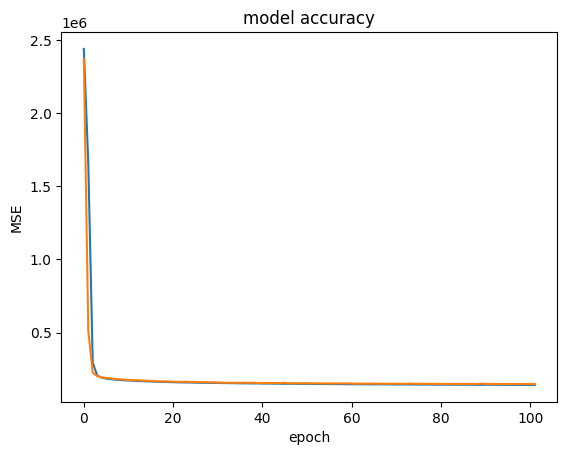

In [87]:
plt.plot(model.history['MSE'])
plt.plot(model.history['val_MSE'])
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.title('model accuracy')
plt.show()

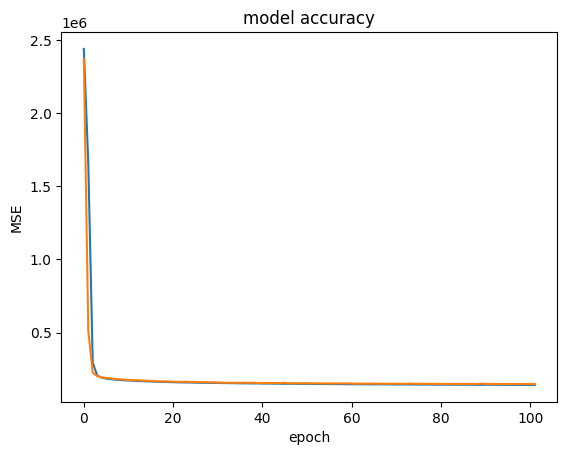

In [88]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.title('model accuracy')
plt.show()

In [74]:
from sklearn.ensemble import RandomForestRegressor
rnc=RandomForestRegressor()
rnc.fit(x_train,y_train)
y_pred1=rnc.predict(x_test)

In [75]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred1)

0.6890682491035407

In [89]:
cleaned=df2.to_csv('Cleaned')

In [91]:
1e+1

10.0